<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

<div style="border:2px solid Black; padding:20px;">

<h1>Отток клиентов</h1>

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Построим модель с предельно большим значением *F1*-меры.

Дополнительно измерим *AUC-ROC*, сравнивая её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

</div>

## Подготовка данных

План работы над проектом:
- Изучить данные.
- Разбить данные на тренировочную, валидационную и тестовую выборку.
- Исследовать задачу.
- Проверить модели на данных без изменений.
- Скоректировать балланс класса.
- Изменить вес класса, урезать 0 или добавить 1.
- Получить улученную модель.
- Провести поиск гиперпараметров.
- Провести финальный тест.
- Написать вывод и оформить проект.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [ ]:
churn_data = pd.read_csv('datasets/Churn.csv');
churn_data.info();
print()
display(churn_data.head());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


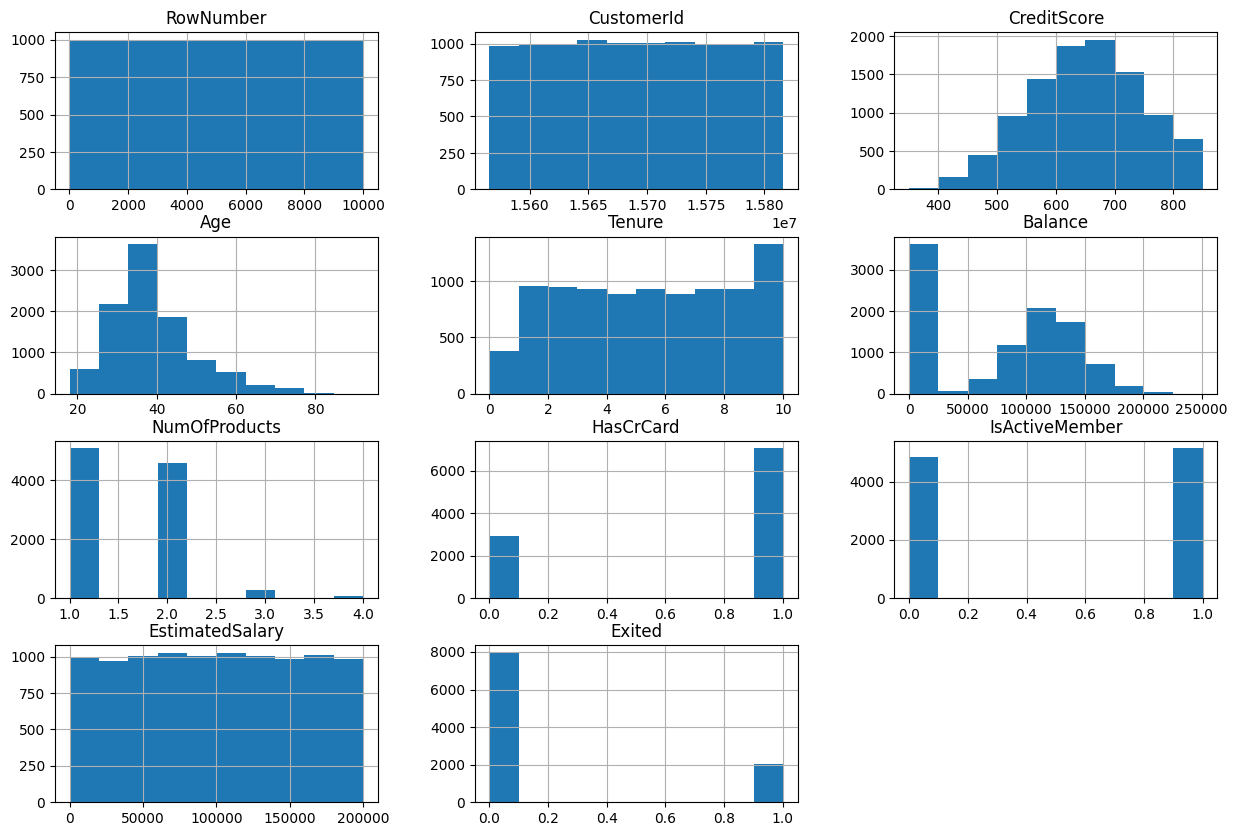

In [ ]:
churn_data.hist(figsize = (15,10));

In [ ]:
def check_columns(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column ,':')
        print(data_frame[column].unique())
        print()

check_columns(churn_data)

Уникальные значения столбца RowNumber :
[    1     2     3 ...  9998  9999 10000]

Уникальные значения столбца CustomerId :
[15634602 15647311 15619304 ... 15584532 15682355 15628319]

Уникальные значения столбца Surname :
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

Уникальные значения столбца CreditScore :
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547

Заменим все NaN из столбца Tenure на медианные значения.

In [ ]:
churn_data['Tenure'] = churn_data['Tenure'].fillna(churn_data['Tenure'].median())
churn_data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

In [ ]:
churn_data['Tenure'].value_counts()

5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: Tenure, dtype: int64

Удалим столбецы RowNumber, CustomerId и Surname. Они не нужны при исследовании модели.

RowNumber повторяет индекс датафрейма, CustomerId - случайный или последовательный номер, который никак не зависит от действий пользователя. Surname - признак, который отличается от человека к человеку и является именем в обществе. Это не гарант того, что клиент останется или уйдет.

In [ ]:
churn_data = churn_data.drop(['RowNumber','CustomerId','Surname'], axis=1)
churn_data.shape

(10000, 11)

Создадим датафрейм, созданный по методу прямого кодирования с защитой от дамми-ловушки.

In [ ]:
ohe_churn_data = pd.get_dummies(churn_data, drop_first=True);
ohe_churn_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


Вывод по шагу 1
Данные готовы к исследованию.

Были удалены не влияющие на конечный фактор данные. Мы создаем модель классификации, который нужно отдать признаки, реально влияющие на суть дела.

## Исследование задачи

Будем использовать следующие модели:

- Логистическая регрессия
- Случайный лес
- Решающее дерево
- GaussianNB

Разобъем данные по принципу 60/20/20.

In [ ]:
target = ohe_churn_data['Exited']
features = ohe_churn_data.drop('Exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4,
                                                                              random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5,
                                                                              random_state=12345)
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


In [ ]:
features_train, features_valid, features_test

(      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 7479          567   35     8.0  153137.74              1          1   
 3411          711   37     8.0  113899.92              1          0   
 6027          850   44     3.0  140393.65              2          0   
 1247          512   24     6.0       0.00              2          1   
 3716          665   27     2.0  147435.96              1          0   
 ...           ...  ...     ...        ...            ...        ...   
 4478          549   31     4.0       0.00              2          0   
 4094          513   29    10.0       0.00              2          0   
 3492          655   45     5.0   57327.04              1          0   
 2177          667   24     4.0       0.00              2          0   
 4578          691   38     1.0       0.00              2          0   
 
       IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
 7479               0         88659.07                  

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train)

features_train= scaler.transform(features_train)
features_valid= scaler.transform(features_valid)
features_test= scaler.transform(features_test)

pd.options.mode.chained_assignment = None


In [ ]:
features_train, features_valid, features_test

(array([[-0.88675067, -0.37319167,  1.08227723, ..., -0.57247478,
          1.72897707,  0.90727838],
        [ 0.60866264, -0.18338494,  1.08227723, ..., -0.57247478,
         -0.57837667, -1.10219754],
        [ 2.05215189,  0.48093862, -0.73769569, ...,  1.74680184,
         -0.57837667,  0.90727838],
        ...,
        [ 0.02711302,  0.57584199, -0.00970652, ..., -0.57247478,
         -0.57837667, -1.10219754],
        [ 0.1517308 , -1.41712869, -0.37370111, ..., -0.57247478,
         -0.57837667, -1.10219754],
        [ 0.40096635, -0.08848157, -1.46568486, ..., -0.57247478,
         -0.57837667,  0.90727838]]),
 array([[-0.69982401, -0.37319167, -1.10169028, ..., -0.57247478,
         -0.57837667, -1.10219754],
        [-0.28443142,  0.57584199, -0.73769569, ..., -0.57247478,
         -0.57837667, -1.10219754],
        [ 0.1517308 , -0.65790176, -1.82967945, ...,  1.74680184,
         -0.57837667,  0.90727838],
        ...,
        [-1.36445215,  0.00642179,  0.35428806, ..., -

Посмотрим, какой существует дисбаланс классов.

In [ ]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Соотношение классов 1:4. Изучим модели без исправление баланса.

Начнем с решающего дерева. Проведем исследование при разном значении max_depth.

In [ ]:
%%time

for depth in range(2, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Max depth', depth,'F1-score', f1_score(target_valid, predicted_valid))

Max depth 2 F1-score 0.5217391304347825
Max depth 3 F1-score 0.4234875444839857
Max depth 4 F1-score 0.5528700906344411
Max depth 5 F1-score 0.5406249999999999
Max depth 6 F1-score 0.5696969696969697
Max depth 7 F1-score 0.5320813771517998
Max depth 8 F1-score 0.5454545454545454
Max depth 9 F1-score 0.5633802816901409
Max depth 10 F1-score 0.5385694249649369
Max depth 11 F1-score 0.5059920106524634
Max depth 12 F1-score 0.521072796934866
Max depth 13 F1-score 0.5038961038961038
Max depth 14 F1-score 0.48675914249684743
Max depth 15 F1-score 0.4975124378109453
Max depth 16 F1-score 0.4987654320987654
Max depth 17 F1-score 0.4767726161369193
Max depth 18 F1-score 0.48522167487684725
Max depth 19 F1-score 0.49521531100478466
Max depth 20 F1-score 0.5006075334143378
Max depth 21 F1-score 0.4981949458483754
Max depth 22 F1-score 0.5006045949214026
Max depth 23 F1-score 0.5006045949214026
Max depth 24 F1-score 0.5006045949214026
Max depth 25 F1-score 0.5006045949214026
Max depth 26 F1-score 

Лучший реультат был достигнут на глубине 6.

Рассмотрим, как себя ведет случайный лес. И проведем исследование на разное количество деревьев.

In [ ]:
%%time

Max_f1 = 0
nE = 0
for estimator in range(10, 251, 10):
    nE += 10
    nD = 0
    for depth in range(1, 16):
        nD += 1
        model = RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        F1 = f1_score(target_valid, predicted_valid)
        print (nE, nD, F1, Max_f1)
        if F1 > Max_f1:
            Max_f1 = F1
            Best_estimators = estimator
            Best_max_depth = depth
        print (Max_f1)

    print('Best N estimators :', Best_estimators,'Best max_depth:', Best_max_depth,'Best F1:', Max_f1)


10 1 0.0 0
0
10 2 0.2 0
0.2
10 3 0.25102880658436216 0.2
0.25102880658436216
10 4 0.49578414839797635 0.25102880658436216
0.49578414839797635
10 5 0.5170731707317073 0.49578414839797635
0.5170731707317073
10 6 0.5475409836065573 0.5170731707317073
0.5475409836065573
10 7 0.5625965996908809 0.5475409836065573
0.5625965996908809
10 8 0.550314465408805 0.5625965996908809
0.5625965996908809
10 9 0.5809379727685325 0.5625965996908809
0.5809379727685325
10 10 0.5891238670694864 0.5809379727685325
0.5891238670694864
10 11 0.5773195876288659 0.5891238670694864
0.5891238670694864
10 12 0.5731166912850812 0.5891238670694864
0.5891238670694864
10 13 0.5638766519823789 0.5891238670694864
0.5891238670694864
10 14 0.5834542815674891 0.5891238670694864
0.5891238670694864
10 15 0.5688888888888889 0.5891238670694864
0.5891238670694864
Best N estimators : 10 Best max_depth: 10 Best F1: 0.5891238670694864
20 1 0.0 0.5891238670694864
0.5891238670694864
20 2 0.15789473684210525 0.5891238670694864
0.5891238

Лучший результат по F1: 0.5937 достигнут при гиперпараметрах равных n_estimators = 250  и max_depth = 15 .
Второй лучший результат по F1: 0.5896 достигается при гиперпараметрах равных n_estimators = 90  и max_depth = 12.
При этом самый быстрый лучший результат по F1: 0.5891 достигается уже при гиперпараметрах равных n_estimators = 10  и max_depth = 10.

По условию задания метрику F1 нужно довести до 0.59 поэтому для дальнейших расчетов будем использовать результат с 250 деревьями с глубиной 15.
При этом надо отметить если бы не стояло такое жесткое условие, то могли для экономии времени использовать немного отстающий от наилучшего результата показатель (F1: 0.589)  достигнутый уже при 10 деревьях и глубине 10.


Исследуем, как работает Логистическая регрессия на этих данных.

In [ ]:
%%time

model =  LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.33108108108108103
CPU times: user 22.3 ms, sys: 12 ms, total: 34.3 ms
Wall time: 29.7 ms


Результаты довольно низкие. Возможно precision или recall низкий и близок к 0.

Рассмотрим как работает Гаусовская байсовая модель.



In [ ]:
%%time

model =  GaussianNB()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.4268656716417911
CPU times: user 9.95 ms, sys: 0 ns, total: 9.95 ms
Wall time: 15.5 ms


Похожий результат, как и логистической регресии.

Проведем оценку accuracy, precision и recall, также покажем F-метрику.

In [ ]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=250, max_depth=15)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = GaussianNB()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Гаусовская байсовая модель')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность попадания по классам 0.858
Precision 0.7768595041322314
Recall 0.44976076555023925
F1 0.5696969696969697

Случайный лес
Точность попадания по классам 0.8645
Precision 0.7951807228915663
Recall 0.47368421052631576
F1 0.5937031484257871

Логистическая регрессия
Точность попадания по классам 0.802
Precision 0.5632183908045977
Recall 0.23444976076555024
F1 0.33108108108108103

Гаусовская байсовая модель
Точность попадания по классам 0.808
Precision 0.5674603174603174
Recall 0.34210526315789475
F1 0.4268656716417911

CPU times: user 2.41 s, sys: 58.9 ms, total: 2.46 s
Wall time: 2.44 s


Проведем построение ROC-кривой для каждой модели. И выведем показатель AUC-ROC.

AUC-ROC DecisionTreeClassifier 0.8164631712023421
AUC-ROC RandomForestClassifier 0.8520315269267296
AUC-ROC LogisticRegression 0.7586363333918061
AUC-ROC GaussianNB 0.7849430494982429


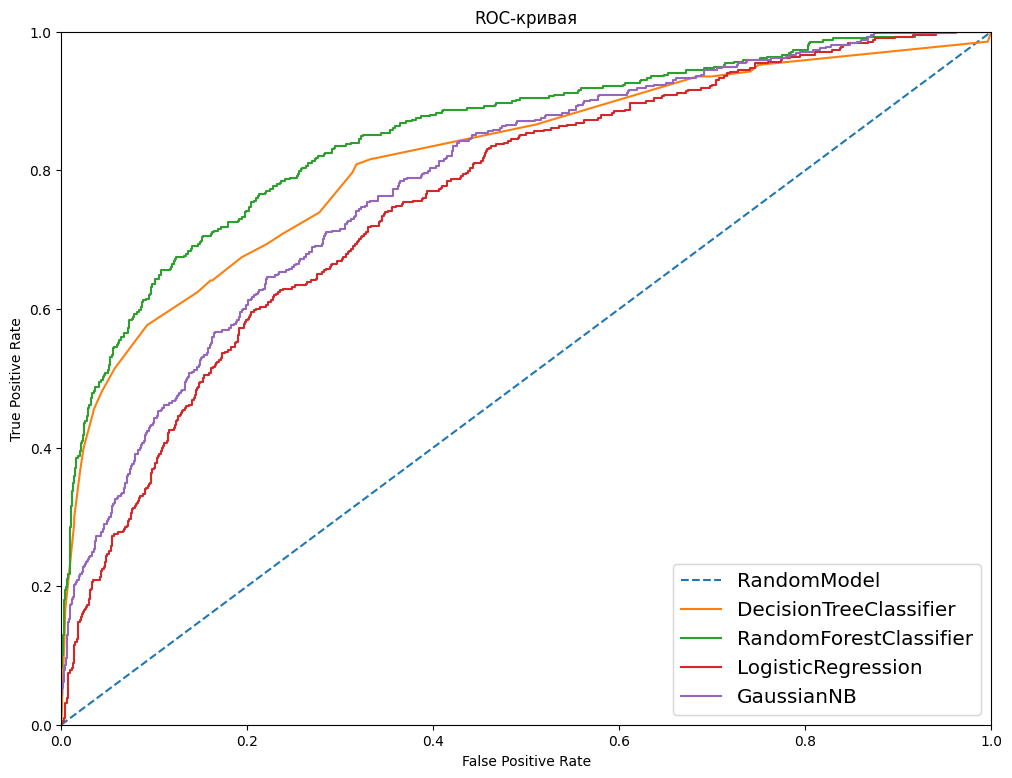

In [ ]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=12345, n_estimators=250, max_depth=6)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

model = GaussianNB()
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC GaussianNB',auc_roc)
plt.plot(fpr, tpr, label='GaussianNB')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

По полученным реззультатам можно заменить, что метрика f1 и AUC-ROC лучшая на случаном лесе.

Вывод по шагу 2:

- В данных сущестует дисбаланс классов в отношении 1:4.

- Возможно он влияет на качество изучаемых моделей.

- Все модели имеют recall ниже, чем percision, из-за перекоса данных, что влияет на F-меру.

## Борьба с дисбалансом

Для борьбы с дисбалансом выполним сравнение моделей:

- С взвешенными классами
- С уменьшенной выборкой
- С увеличенной выборкой

Изучим возможности моделей по взвешиванию классов.

In [ ]:
%%time

# Решающее дерево: подбор оптимальных гиперпараметров после взвешивания.

for depth in range(2, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth,class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Max depth', depth,'F1-score', f1_score(target_valid, predicted_valid))

Max depth 2 F1-score 0.541015625
Max depth 3 F1-score 0.541015625
Max depth 4 F1-score 0.5277777777777778
Max depth 5 F1-score 0.5963791267305644
Max depth 6 F1-score 0.5581835383159887
Max depth 7 F1-score 0.5508390918065154
Max depth 8 F1-score 0.5398058252427185
Max depth 9 F1-score 0.5431119920713577
Max depth 10 F1-score 0.5081495685522531
Max depth 11 F1-score 0.533748701973001
Max depth 12 F1-score 0.5035677879714576
Max depth 13 F1-score 0.5151515151515152
Max depth 14 F1-score 0.4872080088987764
Max depth 15 F1-score 0.47861271676300576
Max depth 16 F1-score 0.49114521841794573
Max depth 17 F1-score 0.4940617577197149
Max depth 18 F1-score 0.47971360381861583
Max depth 19 F1-score 0.47961630695443647
Max depth 20 F1-score 0.4852941176470588
Max depth 21 F1-score 0.4852941176470588
Max depth 22 F1-score 0.48674698795180726
Max depth 23 F1-score 0.4736196319018405
Max depth 24 F1-score 0.4736196319018405
Max depth 25 F1-score 0.4736196319018405
Max depth 26 F1-score 0.4736196319

Наилучший показатель F1 в методе Решающее дерево  достигается при глубине 5

In [ ]:
%%time

# Случайный Лес: подбор оптимальных гиперпараметров после взвешивания.

Max_f1 = 0
nE = 0
for estimator in range(10, 251, 10):
    nE += 10
    nD = 0
    for depth in range(1, 16):
        nD += 1
        model = RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        F1 = f1_score(target_valid, predicted_valid)
        print (nE, nD, F1, Max_f1)
        if F1 > Max_f1:
            Max_f1 = F1
            Best_estimators = estimator
            Best_max_depth = depth
        print (Max_f1)

    print('Best N estimators :', Best_estimators,'Best max_depth:', Best_max_depth,'Best F1:', Max_f1)


10 1 0.5159165751920967 0
0.5159165751920967
10 2 0.569620253164557 0.5159165751920967
0.569620253164557
10 3 0.5668849391955099 0.569620253164557
0.569620253164557
10 4 0.5989637305699482 0.569620253164557
0.5989637305699482
10 5 0.5916334661354582 0.5989637305699482
0.5989637305699482
10 6 0.6071428571428573 0.5989637305699482
0.6071428571428573
10 7 0.6078838174273858 0.6071428571428573
0.6078838174273858
10 8 0.6225596529284164 0.6078838174273858
0.6225596529284164
10 9 0.6087912087912088 0.6225596529284164
0.6225596529284164
10 10 0.6060606060606061 0.6225596529284164
0.6225596529284164
10 11 0.5895522388059701 0.6225596529284164
0.6225596529284164
10 12 0.5802310654685494 0.6225596529284164
0.6225596529284164
10 13 0.5782493368700264 0.6225596529284164
0.6225596529284164
10 14 0.5798319327731092 0.6225596529284164
0.6225596529284164
10 15 0.5684830633284241 0.6225596529284164
0.6225596529284164
Best N estimators : 10 Best max_depth: 8 Best F1: 0.6225596529284164
20 1 0.5280898876

Наилучший показатель F1 в методе Случайный Лес достигается при колличестве деревьев 200 и глубине 9

In [ ]:
%%time

model =  LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.4888507718696398
CPU times: user 23.8 ms, sys: 9.79 ms, total: 33.6 ms
Wall time: 31.1 ms


Результаты довольно низкие. Но выше чем до взвешивания.  

Проведем оценку accuracy, precision и recall, также покажем F-метрику после взвешивания.

In [ ]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=200, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()


model = GaussianNB()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Гаусовская байсовая модель')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность попадания по классам 0.8105
Precision 0.5374280230326296
Recall 0.6698564593301436
F1 0.5963791267305644

Случайный лес
Точность попадания по классам 0.841
Precision 0.6136363636363636
Recall 0.645933014354067
F1 0.6293706293706294

Логистическая регрессия
Точность попадания по классам 0.702
Precision 0.3810160427807487
Recall 0.6818181818181818
F1 0.4888507718696398

Гаусовская байсовая модель
Точность попадания по классам 0.808
Precision 0.5674603174603174
Recall 0.34210526315789475
F1 0.4268656716417911

CPU times: user 1.91 s, sys: 42.8 ms, total: 1.96 s
Wall time: 2.04 s


Проведем построение ROC-кривой для каждой модели после взвешивания. И выведем показатель AUC-ROC.

AUC-ROC DecisionTreeClassifier 0.8310244134068074
AUC-ROC RandomForestClassifier 0.8560419552501526
AUC-ROC LogisticRegression 0.7635692207187316
AUC-ROC GaussianNB 0.7849430494982429


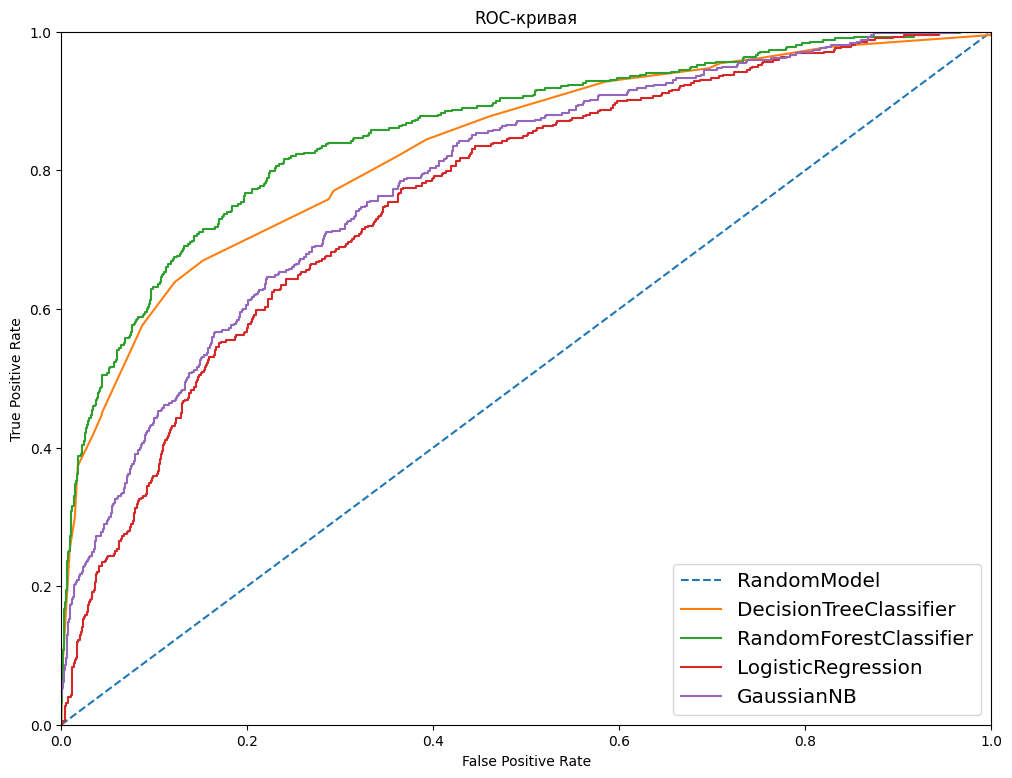

In [ ]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=12345, n_estimators=200, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

model = GaussianNB()
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC GaussianNB',auc_roc)
plt.plot(fpr, tpr, label='GaussianNB')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

По полученным результатам после взвешивания можно заменить, что метрика f1 и AUC-ROC лучшая на случаном лесе.


F-мера выросла у решающего дерева и случайного леса и логистической регрессии.

Исследуем другой способ: уменьшения значений класса 0.

In [ ]:
features_train_new=pd.DataFrame(data = features_train, index = target_train.index)

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train_new, target_train, 0.25)

print(target_downsampled.value_counts())

0    1201
1    1196
Name: Exited, dtype: int64


In [ ]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=250,max_depth=15)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = GaussianNB()
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Гаусовская байсовая модель')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность попадания по классам 0.776
Precision 0.47641509433962265
Recall 0.7248803827751196
F1 0.5749525616698292

Случайный лес
Точность попадания по классам 0.7765
Precision 0.4778625954198473
Recall 0.7488038277511961
F1 0.5834109972041007

Логистическая регрессия
Точность попадания по классам 0.7005
Precision 0.3785234899328859
Recall 0.6746411483253588
F1 0.4849527085124678

Гаусовская байсовая модель
Точность попадания по классам 0.7115
Precision 0.39154160982264663
Recall 0.6866028708133971
F1 0.4986967854039965

CPU times: user 1.71 s, sys: 36.9 ms, total: 1.75 s
Wall time: 1.77 s


Показатели логистической регрессии и гаусовской модели выросли. Показатели у решающего дерева и случайного леса стали хуже.

Исследуем методы увеличения класса 1.

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train_new, target_train, 4)

print(target_upsampled.value_counts())

0    4804
1    4784
Name: Exited, dtype: int64


In [ ]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=250, max_depth=15)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = GaussianNB()
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Гаусовская байсовая модель')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность попадания по классам 0.7665
Precision 0.4616588419405321
Recall 0.7057416267942583
F1 0.5581835383159887

Случайный лес
Точность попадания по классам 0.847
Precision 0.6497326203208557
Recall 0.5813397129186603
F1 0.6136363636363636

Логистическая регрессия
Точность попадания по классам 0.702
Precision 0.3810160427807487
Recall 0.6818181818181818
F1 0.4888507718696398

Гаусовская байсовая модель
Точность попадания по классам 0.714
Precision 0.3956639566395664
Recall 0.6985645933014354
F1 0.5051903114186851

CPU times: user 4.19 s, sys: 64.7 ms, total: 4.26 s
Wall time: 4.33 s


F-мера стала лучше у случайного леса, логистической регресии и гаусовской модели по сравнению с дисбалансными данными. Лучшей моделью по F-мера является  случайны лес с тренировочными данными, где увеличен класс 1.

Выведем ROC-кривую и AUC-ROC для посленнего измененного баланса.

AUC-ROC DecisionTreeClassifier 0.7999473744699641
AUC-ROC RandomForestClassifier 0.8438276907070573
AUC-ROC LogisticRegression 0.763567708490857
AUC-ROC GaussianNB 0.7849430494982429


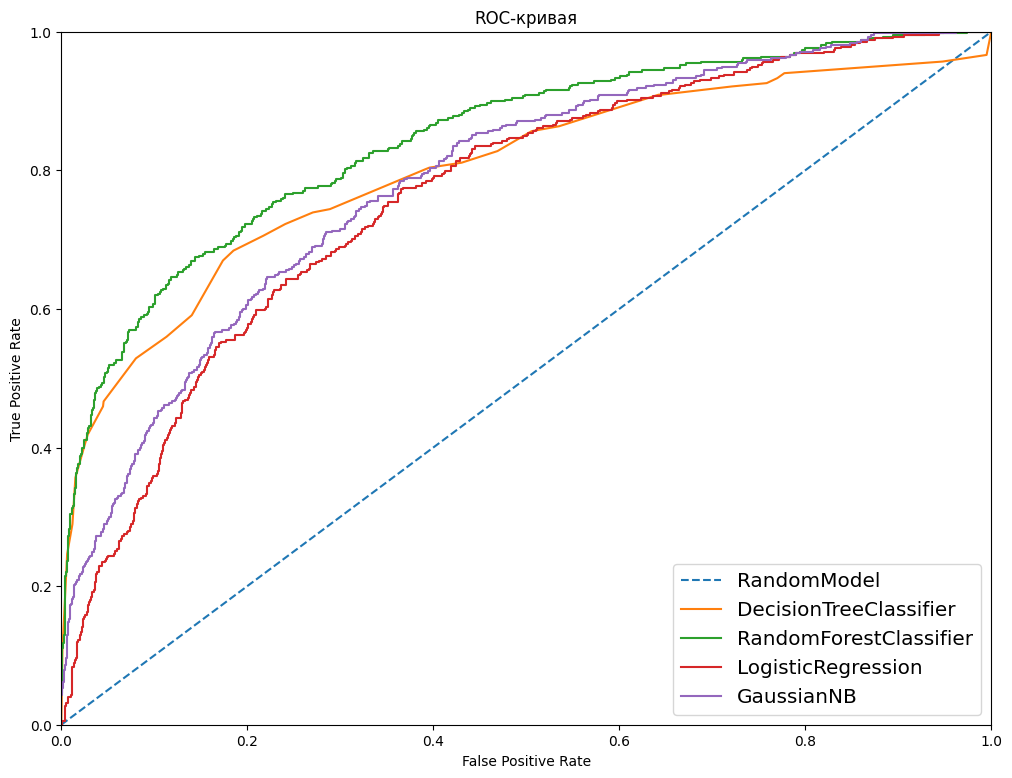

In [ ]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=12345, n_estimators=250, max_depth=15)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

model = GaussianNB()
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC GaussianNB',auc_roc)
plt.plot(fpr, tpr, label='GaussianNB')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

Вывод по шагу 3:

- Дисбаланс повлиял на модели в худшую сторону.
- Лучшим решением стало увеличение классов 1 в тренировочной выборке.

Выравние классов в выборке привело к резкому росту параметра recall и небольшому понижению percison. Но в целом F-мера выросла.

## Тестирование модели

К тестовой выборке примем модель случайного дерева.



In [ ]:
%%time

model =  RandomForestClassifier(random_state=12345, n_estimators=250, max_depth =15)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.6136363636363636
CPU times: user 3.95 s, sys: 17.9 ms, total: 3.96 s
Wall time: 4.05 s


In [ ]:
model = RandomForestClassifier(random_state=12345, n_estimators=250, max_depth=15)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - дисбаланс классов')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=200, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - взвешенные классы')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=250, max_depth=15)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - уменьшенное количество классов 0')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=250, max_depth=15)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - увеличенное количество классов 1')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

Случайный лес - дисбаланс классов
Точность попадания по классам 0.846
Precision 0.7426160337552743
Recall 0.4160756501182033
F1 0.5333333333333334

Случайный лес - взвешенные классы
Точность попадания по классам 0.8305
Precision 0.5933333333333334
Recall 0.6312056737588653
F1 0.6116838487972509

Случайный лес - уменьшенное количество классов 0
Точность попадания по классам 0.775
Precision 0.4795763993948563
Recall 0.7494089834515366
F1 0.584870848708487

Случайный лес - увеличенное количество классов 1
Точность попадания по классам 0.8435
Precision 0.6510989010989011
Recall 0.5602836879432624
F1 0.602287166454892



AUC-ROC RandomForestClassifier - disbalanced 0.8579386602025871
AUC-ROC RandomForestClassifier - balanced by class weight 0.8569252748208214
AUC-ROC RandomForestClassifier - balanced by reduce 0 class 0.8498900416897152
AUC-ROC RandomForestClassifier - balanced by grow 1 class 0.8522001406147173


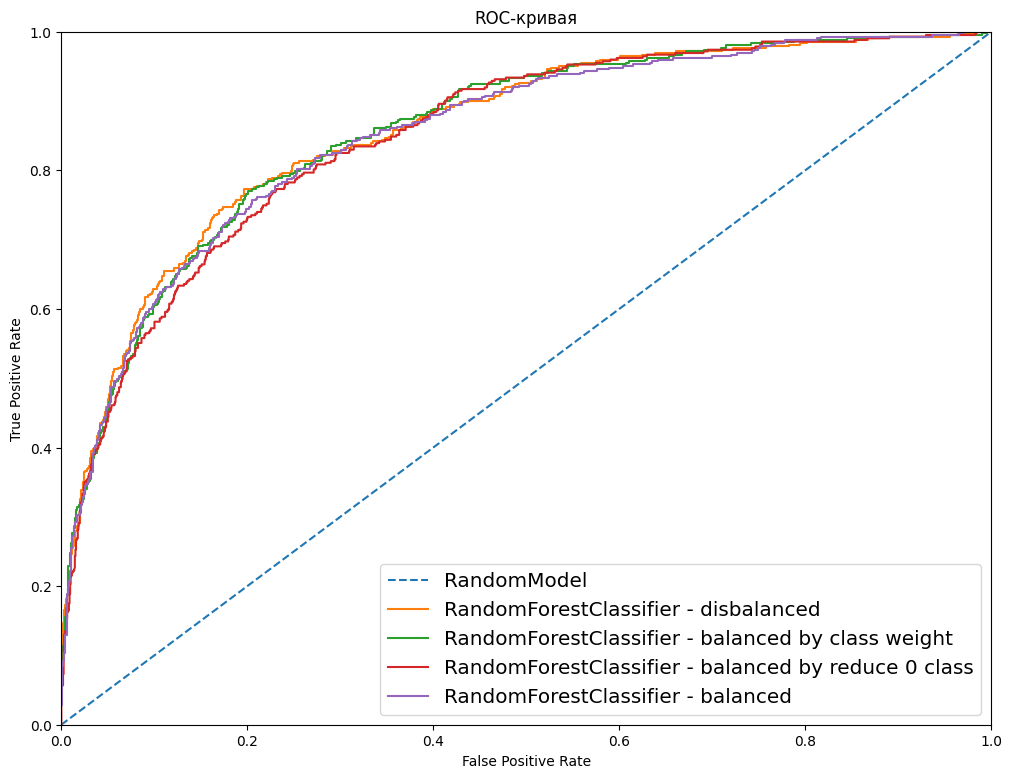

In [ ]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = RandomForestClassifier(random_state=12345, n_estimators=250, max_depth=15)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - disbalanced',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - disbalanced')

model = RandomForestClassifier(random_state=12345, n_estimators=200, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - balanced by class weight',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced by class weight')

model = RandomForestClassifier(random_state=12345, n_estimators=250, max_depth=15)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - balanced by reduce 0 class',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced by reduce 0 class')

model = RandomForestClassifier(random_state=12345, n_estimators=250, max_depth=15)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - balanced by grow 1 class',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

Вывод по шагу 4:

- 2 из 4 моделей достигли минимума F-меры на тестовых данных: модель случайного леса со взвешенными весами классов и модель с увеличенным количеством класса 1.

- Видно, что взвешивание классов дает результат лучше для данного набора данных. Percision падает, recall растет, и в целом F-мера имеет небольшой прирост. Баланс классов повышает охват необходимых данных.

- Оценивая адеватность модели можно заметить, что AUC-ROC дисбалансной модели и модели с весами примерно одинаково предсказывают вероятность ухода клиента.

- В результате исследования была получена модель с лучшими показателями как по F1-мере, так и по AUC-ROC - Случайный лес: взвешенные классы.

<div style="border:2px solid Black; padding:20px;">

# Итоговый вывод:

При работе с проектом было выполнено:

- Изучены данные. Разбиты данные на тренировочную, валидационную и тестовую выборку.
- Исследована задача. Проверены модели на данных без изменений.
- Скоректирован балланс класса. Изменен вес класса.
- Получена улученная модель. Проведен поиск гиперпараметров.
- Проведен финальный тест.

Обученная модель случайного леса со взвешенными классами имеет достаточную адекватность, подтвержденная ее значением AUC-ROC = 0.8579.
Это лучше, чем случайная модель предсказывания (AUC-ROC = 0.5).
Точность попадания по классам 0.834, precision 0.6, recall 0.645 и f1 0.6218.
Модель старается собрать больше данных, чем показать верную точность (recall > precision).
Процент попадания в классы достаточно высокий.

</div>